# 基本概念

## 监督学习
- 分类
- 回归

## 无监督学习
- 聚类
- 降维

**训练好的模型，输入新数据，叫做预测**

常见分类模型： 高斯朴素贝叶斯、支持向量机、随机森林分类

- 分类： 预测离散标签
- 回归： 预测连续标签
- 聚类： 为无标签数据添加标签
- 降维： 推断无标签数据的结构 （isomap、局部线性嵌入算法）

## 数据表
- 行 称为 样本
- 列 称为 特征
- 行列一起 称为 特征矩阵
- 目标数组 一般是一维，长度一般与 样本总数相同

In [1]:
import pandas as pd
iris = pd.read_csv('seaborn-data/iris.csv')

In [2]:
iris.shape
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
x_iris = iris.drop('species', axis=1)
x_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
print(y_iris.shape)

(150,)


## 评估器API

**常用步骤**
- 导入适当的评估器类，选择模型类
- 用合适的数值对模型类进行实例化，配置模型的**超参数**
- 整理数据，获取特征矩阵和目标数组
- 调用模型实例的fit()方法对数据进行拟合
- 对新数据应用模型
    - 有监督学习，通常使用predict
    - 无监督学习，通常采用transform或者predict方法转换或推断数据的性质

## 有监督学习
**简单的线性回归**

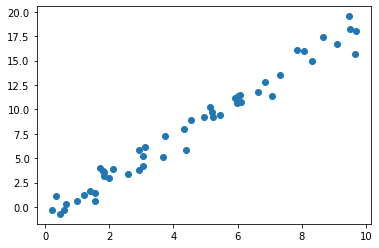

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

**导入简单的线性回归模型**

In [6]:
from sklearn.linear_model import LinearRegression  # linear 线性的 regression 回归的
model = LinearRegression(fit_intercept=True)  # 拟合直线的 截距 intercept 
model

LinearRegression()

In [7]:
print(x.shape)
X = x[:, np.newaxis]
print(X.shape, y.shape)

(50,)
(50, 1) (50,)


In [8]:
model.fit(X, y)

LinearRegression()

In [9]:
model.coef_

array([1.9776566])

In [10]:
model.intercept_

-0.9033107255311146

**对拟合的模型进行预测**

In [11]:
xfit = np.linspace(-1, 11)  # 默认长度50分
xfit.shape

(50,)

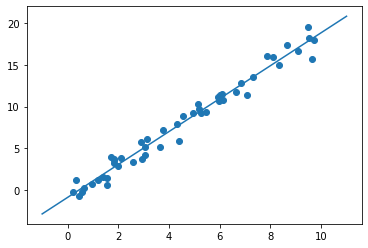

In [12]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.plot(Xfit, yfit)
plt.scatter(X, y)

### 有监督学习：分类问题

**示例iris分类**
- 高斯朴素贝叶斯

**数据分类，训练集 和 测试集**

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state=1)

In [14]:
# 导入朴素贝叶斯公式
from sklearn.naive_bayes import GaussianNB   
model = GaussianNB()  # 初始化模型
model.fit(Xtrain, ytrain) # 用模型 拟合数据
y_model = model.predict(Xtest) # 对测试集 进行预测

In [15]:
from sklearn.metrics import accuracy_score # metrics 量度， accuracy 准确度，
accuracy_score(ytest, y_model) 

0.9736842105263158

## 无监督学习， 降维

**iris降维**

In [16]:
from sklearn.decomposition import PCA  # 主成分 分析 PCA
model = PCA(n_components=2) # 设置超参数
model.fit(x_iris)           # 拟合数据
X_2D = model.transform(x_iris) # 数据 降为 2 维度

In [17]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


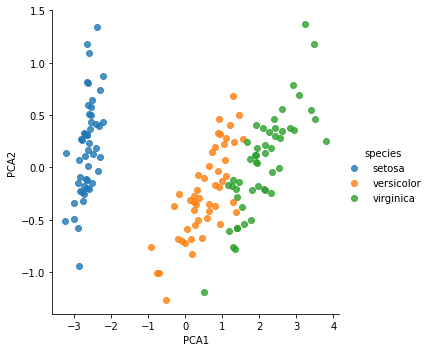

In [18]:
import seaborn as sb
sb.lmplot(x= 'PCA1', y='PCA2', hue='species', data = iris, fit_reg=False)

## 无监督学习 聚类

**使用GMM 进行聚类**

In [19]:
from sklearn.mixture import GaussianMixture # 高斯 混合 模型
model = GaussianMixture(n_components=3, covariance_type='full') # covariance 协方差 类型
model.fit(x_iris) # 拟合数据 只需要 x 数据， 不需要y的数据
y_gmm = model.predict(x_iris) # 
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


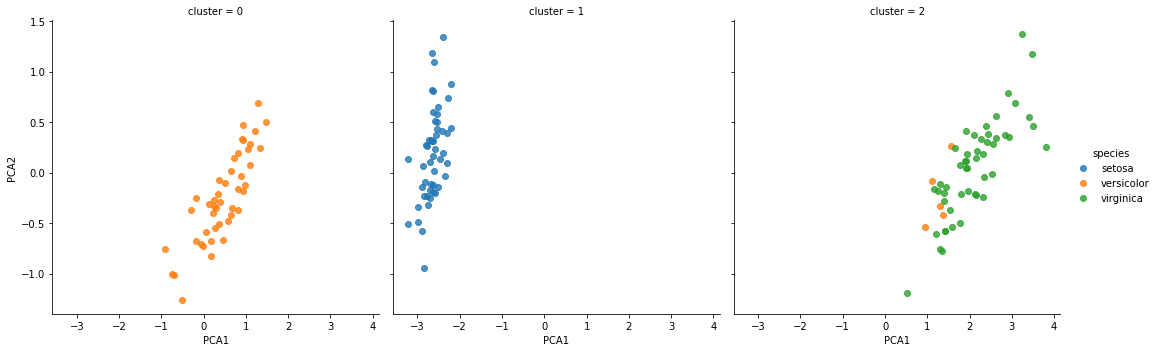

In [20]:
iris['cluster'] = y_gmm
sb.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

## 应用： 手写数字探索

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape  # 1797 个样本， 8 x 8 个像素

(1797, 8, 8)

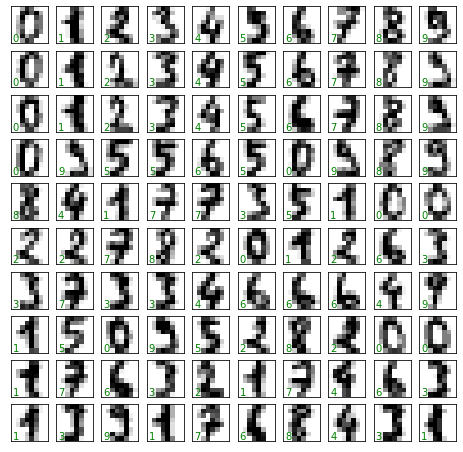

In [22]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8,8), 
                         subplot_kw= {'xticks':[], 'yticks': []},  # 设置子图的 的属性
                         gridspec_kw=dict(hspace=0.2, wspace=0.2)) # 设置子图的 网格位置的 属性
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') # interpolation 插值， nearest 最近的
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green') # transform 变换坐标系的


In [23]:
X = digits.data
y = digits.target
print(X.shape, y.shape)

(1797, 64) (1797,)


**降维处理**

In [24]:
from sklearn.manifold import Isomap  
iso = Isomap(n_components=2)
iso.fit(digits.data)   # 对64 维 数据进行降维
data_projected = iso.transform(digits.data) # 对 数据进行预测
data_projected.shape

/Users/maserhe/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/maserhe/Library/Python/3.8/lib/python/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

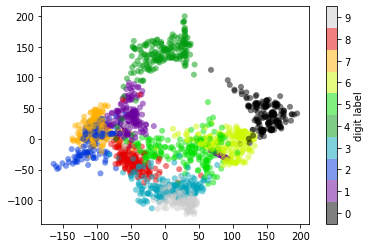

In [25]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], 
            c=digits.target, 
            edgecolors='none', 
            alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

**数字进行分类**

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0) # 参数， 特征矩阵， 目标矩阵
from sklearn.naive_bayes import GaussianNB # 高斯 朴素贝叶斯算法
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest) # 对测试集合 进行预测

**对预测结果进行打分**

In [27]:
accuracy_score(ytest, y_model)

0.8333333333333334

**使用混淆矩阵**

Text(91.68, 0.5, 'true value')

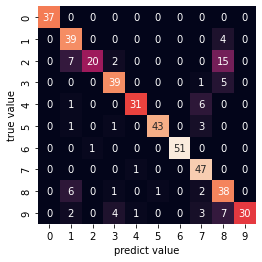

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model) # 测试集 对比 模型
sb.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predict value')
plt.ylabel('true value')

## 模型验证

- 留出集
- 交叉验证

## 最优模型选择
-  偏差 和 方差 的均衡  
- **高偏差 (欠拟合， 灵活性低)**
- **高方差（过拟合， 学习了数据的噪音)**

**验证曲线**

## 特征工程

**分类特征**
- 独热编码
- 问题： 矩阵稀疏
- 解决： 使用稀疏矩阵表示

**文本特征**
- 单词统计
- 问题：热频词，聚集高，权重大
- 解决：TF-IDF 词频率逆文档频率

**图像特征**

**衍生特征**
- 构造 多项式特征
- 基于函数回归

**缺失值填充**
- 均值、中位数等

**特征管道**
- 使用多个步骤

## 专题： 朴素贝叶斯分类

**朴素贝叶斯：每个标签的数据都服从简单的高斯分布**

**多项式朴素贝叶斯：特征是由一个简单多项式分布生成的**
- 文本分类

In [31]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [37]:
# 选择四类 新闻
index = ['talk.politics.guns', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=index)
test = fetch_20newsgroups(subset='test', categories=index)

In [38]:
## 因为是文本，采用TF-IDF向量法
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF
from sklearn.naive_bayes import MultinomialNB  # 多项式 朴素贝叶斯
from sklearn.pipeline import make_pipeline  # 特征管道

In [49]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(np.array(train.data), train.target)
labels = model.predict(test.data)

In [51]:
## 模型结果预测
from sklearn.metrics import accuracy_score
accuracy_score(test.target, labels)  # 预测的准确度

0.9320388349514563

<AxesSubplot:>

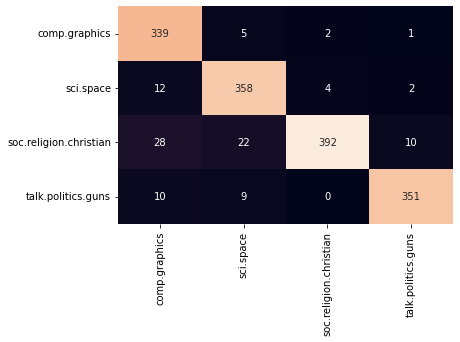

In [55]:
## 混淆矩阵进行预测
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sb.heatmap(mat.T,   # 进行转置
           square=False,  # 设置方阵
           annot=True,  # 显示数据  annot 注解
           fmt='d',
           cbar=False, 
           xticklabels=train.target_names, 
           yticklabels=train.target_names)


**朴素贝叶斯的应用场景**
- 优点：
 - 训练和预测的速度快
 - 直接使用概率预测
 - 通常容易解释
 - 可调节的参数少
- 场景：
 - 假设分布函数与数据匹配 （实际中很少见）
 - 各种类型的区分度很高，模型复杂度不高 
 - 非常高维度的数据，模型复杂度不重要

## 专题：线性回归

**简单的线性回归**

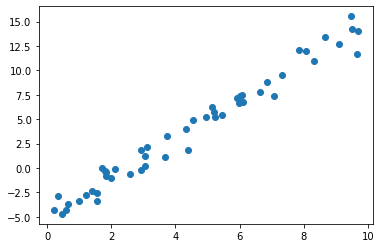

In [58]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 5 +  rng.randn(50)

# 绘制 散点图
plt.scatter(x, y)

In [62]:
# 对上面模型进行简单 拟合
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # 拟合 截距
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
ypredict = model.predict(xfit[:, np.newaxis])

(1000,) (1000,) (1000, 1)


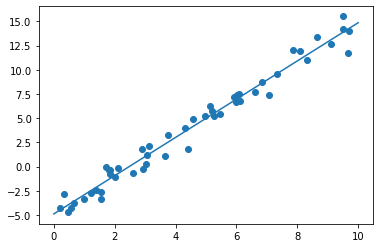

In [65]:
plt.scatter(x, y)
plt.plot(xfit, ypredict)
print(xfit.shape, ypredict.shape, xfit[:, np.newaxis].shape)

In [66]:
# 查看结果
print('model slope:  ', model.coef_[0])
print('mdoel intercept: ', model.intercept_)

model slope:   1.9776566003853107
mdoel intercept:  -4.903310725531115


**基于函数回归**

In [71]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False) # bias 偏差 
poly.fit_transform(x[:, np.newaxis])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

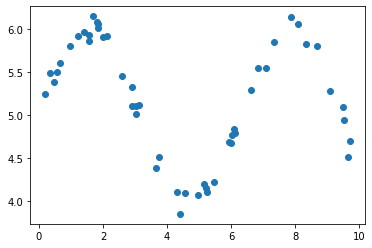

In [74]:
## 管道 加 七次多项式回归模型
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression(fit_intercept=True))
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50) + 5

plt.scatter(x[:, None], y)

<bound method Pipeline._iter of Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])>


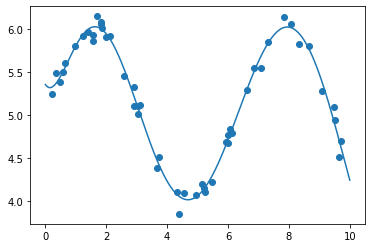

In [79]:
# 进行模型训练和 预测
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x[:, None], y)
plt.plot(xfit, yfit)

**正则化**
- 岭回归 （L2范数正则化），吉洪诺夫正则化
 - 对模型系数平方和进行惩罚
- Lasso 正则化 (L1范数）
 - 对模型系数的绝对值进行惩罚